# Week 6 editing selectdata()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import sympy as sym
from sympy import solve
import os

Let's open a screen capture that I saved as an image of a plot from the journal article: Polymer Testing, vol 48, pp. 125-132 (2015).  File: `"crystallization kinetics poly testing 48 2015 p 125.png"`

## From week 5:  
<hr style="height: 3.0px"/>  

The following code displays our image file and let's us pick points from the image.  The pixel positions of these points are saved in variable, **pixel_positions**

In [2]:
path=r"C:\Users\Sean\OneDrive - Virginia Tech\Documents\Teaching\2114 & 3114 Math I & II\git_2114_3114\images"
filename='crystallization kinetics poly testing 48 2015 p 125.png'
fullpath=os.path.join(path, filename)

I've taken the code from week 5 and placed it in a function called "selectdata" and "cal" for calibrate data.  

In [180]:
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke

# pixel data stored in variable "pixel_positions"
def selectdata(image_file):
    %matplotlib notebook
    #now we have 1 row and 2 columns i.e. 2 figures in a row
    fig, ax1 = plt.subplots(nrows=1, ncols=1,figsize=(7, 7))
    # gridspec_kw={'width_ratios': [2, 2]} can be used above if needed

    # turn off the x, y axis on the image - the axis doesn't make sense for an image
    #ax1.axis(False)
    
    img = mpimg.imread(image_file) #matplotlib
    # .add_axes([left, bottom, width, height])
#     image_axis = fig.add_axes([0, 0, 0.47, 0.9], zorder=-1, anchor=(0.5,1)) #zorder places figure on top of anything else in axes
#     image_axis.imshow(img)
#     image_axis.axis('off')
    #ax1.imshow(img, zorder=1)
    #ax1.axis('off')
    # recall from part 1 that image files have coord in left top corner so we need to correct by the y-dimension of the file
    ydim=img.shape[0]

    # setting title and labels for ax1 (figure on the left)
    ax1.set_title('Click on data you want to collect below')
    ax1.set_xlabel('x-pixel position', fontsize='8')
    ax1.set_ylabel('y-pixel position', fontsize='8')
    plt.tick_params(labelsize = 6)
    #ax1.set_xlim([0,img.shape[1]])
    #ax1.set_ylim([0,img.shape[0]])
    ax1.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]], zorder=1)
    #ax1.axis('off')
    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(0.5)

    
    global pixel_positions #makes pixel_positions a global variable so we have access to it outside this function
    pixel_positions = []
    def onclick(event):
        if event.button==1:
            pixel_positions.append([event.xdata,event.ydata])
            ax1.set_title(f'Click on data you want to collect below \nLast click: [{event.xdata:.3f}, {event.ydata:.3f}]')
            #ax2.scatter(event.xdata, ydim-event.ydata, marker='o', c='r', edgecolor='k') #adding scatter plot
            ax1.scatter(event.xdata, event.ydata, edgecolor='r', c='k', zorder=2, s=7)
#             circle = Circle((event.xdata, event.ydata), radius=0.01, clip_on=False, zorder=10, linewidth=1,
#                     edgecolor='black', facecolor=(0, 0, 0, .0125),
#                     path_effects=[withStroke(linewidth=5, foreground='w')])
#             ax1.add_artist(circle)
            #ax1.scatter(event.xdata, event.ydata, marker='.', c='c', edgecolor='k') #adding scatter plot
    cid=fig.canvas.mpl_connect('button_press_event', onclick) 
    fig.show()
    
# enter list of three pixel points and list of three corresponding plot points 
def cal(pixpts, plotpts, datatoconvert):    
    %matplotlib inline
    xpx1, ypx1 = pixpts[0]
    x1, y1 = plotpts[0]
    xpx2, ypx2 = pixpts[1]
    x2, y2 = plotpts[1]
    xpx3, ypx3 = pixpts[2]
    x3, y3 = plotpts[2]
    
    # general solution for calibration constants
    m11=(x1*ypx2 - x1*ypx3 - x2*ypx1 + x2*ypx3 + x3*ypx1 - x3*ypx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    m12=-(x1*xpx2 - x1*xpx3 - x2*xpx1 + x2*xpx3 + x3*xpx1 - x3*xpx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    m21=(y1*ypx2 - y1*ypx3 - y2*ypx1 + y2*ypx3 + y3*ypx1 - y3*ypx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    m22=-(-xpx1*y2 + xpx1*y3 + xpx2*y1 - xpx2*y3 - xpx3*y1 + xpx3*y2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    Ox=(-x1*xpx2*y3 + x1*xpx3*y2 + x2*xpx1*y3 - x2*xpx3*y1 - x3*xpx1*y2 + x3*xpx2*y1)/(x1*y2 - x1*y3 - x2*y1 + x2*y3 + x3*y1 - x3*y2)
    Oy=(x1*y2*ypx3 - x1*y3*ypx2 - x2*y1*ypx3 + x2*y3*ypx1 + x3*y1*ypx2 - x3*y2*ypx1)/(x1*y2 - x1*y3 - x2*y1 + x2*y3 + x3*y1 - x3*y2)
    
    # define our calibrated transf matrix, m_cal, and our calibrated offset, offset_cal
    m_cal=[[m11, m12],[m21,m22]]
    offset_cal=[Ox, Oy]
    
    # return as numpy arrays
    # return(np.array(m_cal), np.array(offset_cal))
    plot_data=np.array([np.matmul(m_cal, point-offset_cal) for point in np.array(datatoconvert)])

    return(plot_data)

In [30]:
pixel_positions

[[127.32322580645157, 94.57792207792207],
 [123.57612903225802, 46.785714285714334],
 [122.3270967741935, 134.05844155844156],
 [112.3348387096774, 225.48701298701297]]

<IPython.core.display.Javascript object>


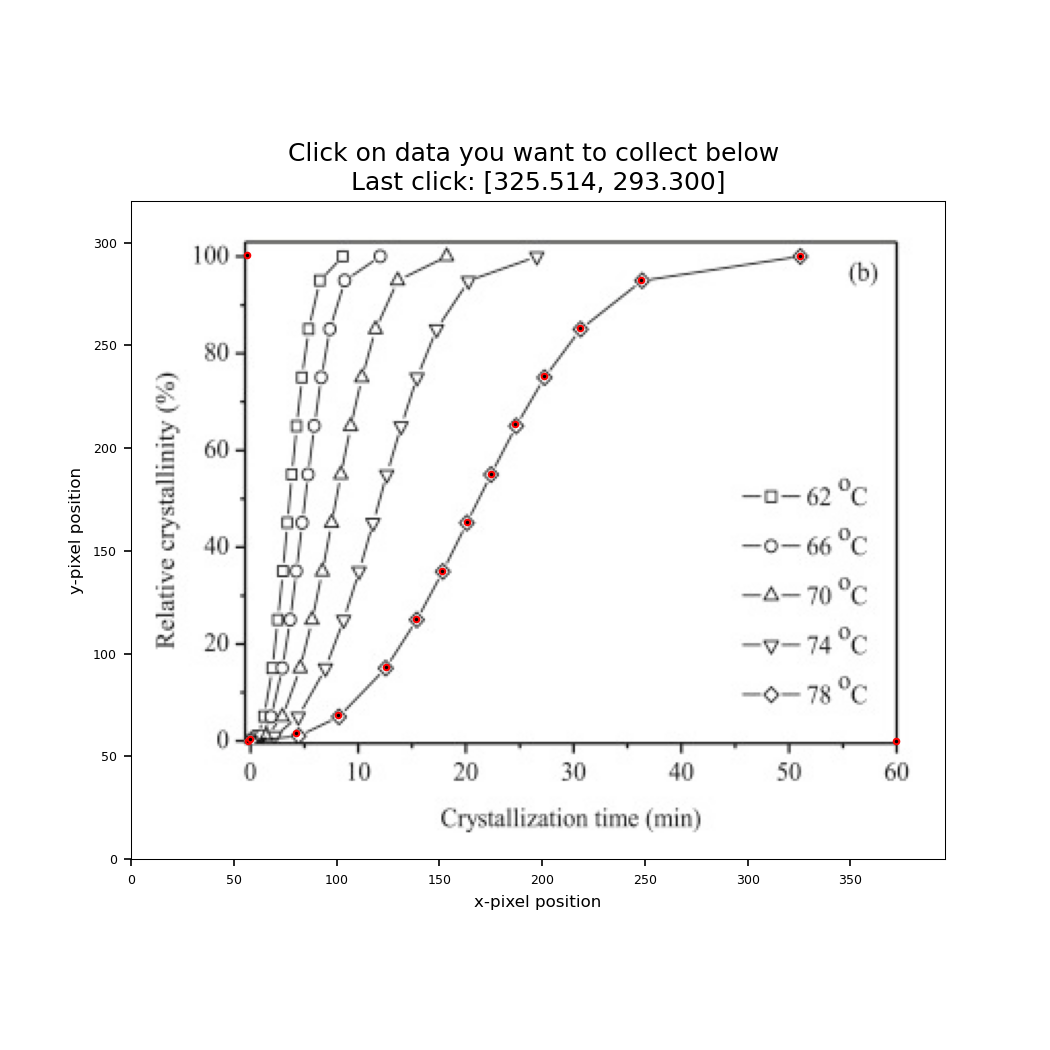

In [178]:
selectdata(fullpath)

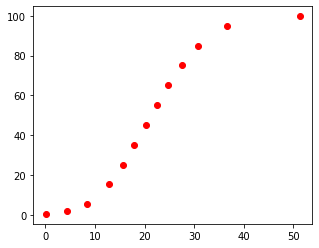

In [181]:
# cal(pixpts, plotpts, datatoconvert)
plot_data=cal(pixel_positions[0:3], [[60,0],[0,0],[0,100]], pixel_positions[3:])

plt.subplots(figsize=[5,4])
plt.plot(plot_data[:,0], plot_data[:,1], 'ro');

## Let's look at the function cal() defined above because it is written differently than before.  There is no longer a solve() command and the solution for m11, etc are written out.  

The general formula will be $m \cdot \ (pixel\ coord - \text{offset}) = plot\ values$ where $m$ is the transformation matrix.  

$$\begin{bmatrix}m11 & m12 \\m21 & m22 \end{bmatrix}\cdot \left( \left[\begin{array}{c}pixX\\ pixY\end{array}\right] - \left[\begin{array}{c}Ox\\ Oy\end{array}\right]\right)=\left[\begin{array}{c}Xvalue\\ Yvalue\end{array}\right]$$

We are solving for m11, m12, m21, m22, Ox, Oy

>This time we are going to **solve for the general case** and then we don't need to include this solve command in our function anymore...

In [3]:
# define our matrices
m11, m12, m21, m22, Ox, Oy = sym.symbols('m11, m12, m21, m22, Ox, Oy')
m = sym.Matrix([[m11, m12],[m21, m22]])
offset=sym.Matrix([Ox,Oy])

In [4]:
# define our general equations for three pixel points [xpx1, ypx1], [xpx2, ypx2], [xpx3, ypx3]
# and for their corresponding plot values from the image [x1,y1], [x2,y2], [x3,y3]
xpx1,ypx1,xpx2,ypx2,xpx3,ypx3,x1,y1,x2,y2,x3,y3 = sym.symbols('xpx1,ypx1,xpx2,ypx2,xpx3,ypx3,x1,y1,x2,y2,x3,y3')
# now our general equations are: 
eq1=m*(sym.Matrix([xpx1, ypx1])-offset)-sym.Matrix([x1, y1])
eq2=m*(sym.Matrix([xpx2, ypx2])-offset)-sym.Matrix([x2,y2])
eq3=m*(sym.Matrix([xpx3, ypx3])-offset)-sym.Matrix([x3,y3])
# solve general equations for [m11, m12, m21, m22, Ox, Oy] in terms of [xpx1,ypx1,xpx2,ypx2,xpx3,ypx3,x1,y1,x2,y2,x3,y3]
sol1=solve([eq1,eq2,eq3],[m11, m12, m21, m22, Ox, Oy], dict=True)
sol1

[{m11: (x1*ypx2 - x1*ypx3 - x2*ypx1 + x2*ypx3 + x3*ypx1 - x3*ypx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2),
  m12: -(x1*xpx2 - x1*xpx3 - x2*xpx1 + x2*xpx3 + x3*xpx1 - x3*xpx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2),
  m21: (y1*ypx2 - y1*ypx3 - y2*ypx1 + y2*ypx3 + y3*ypx1 - y3*ypx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2),
  m22: -(-xpx1*y2 + xpx1*y3 + xpx2*y1 - xpx2*y3 - xpx3*y1 + xpx3*y2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2),
  Ox: (-x1*xpx2*y3 + x1*xpx3*y2 + x2*xpx1*y3 - x2*xpx3*y1 - x3*xpx1*y2 + x3*xpx2*y1)/(x1*y2 - x1*y3 - x2*y1 + x2*y3 + x3*y1 - x3*y2),
  Oy: (x1*y2*ypx3 - x1*y3*ypx2 - x2*y1*ypx3 + x2*y3*ypx1 + x3*y1*ypx2 - x3*y2*ypx1)/(x1*y2 - x1*y3 - x2*y1 + x2*y3 + x3*y1 - x3*y2)}]

In [5]:
# so m11 for example equals 
sol1[0][m11]

(x1*ypx2 - x1*ypx3 - x2*ypx1 + x2*ypx3 + x3*ypx1 - x3*ypx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)

We no longer need to solve for our matrix calibration values we can now directly define [m11, m12, m21, m22, Ox, Oy] in our function in terms of our calibration points:  

In [6]:
# enter list of three pixel points and list of three corresponding plot points 
def cal(pixpts, plotpts, datatoconvert):    
    
    xpx1, ypx1 = pixpts[0]
    x1, y1 = plotpts[0]
    xpx2, ypx2 = pixpts[1]
    x2, y2 = plotpts[1]
    xpx3, ypx3 = pixpts[2]
    x3, y3 = plotpts[2]
    
    # general solution for calibration constants
    m11=(x1*ypx2 - x1*ypx3 - x2*ypx1 + x2*ypx3 + x3*ypx1 - x3*ypx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    m12=-(x1*xpx2 - x1*xpx3 - x2*xpx1 + x2*xpx3 + x3*xpx1 - x3*xpx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    m21=(y1*ypx2 - y1*ypx3 - y2*ypx1 + y2*ypx3 + y3*ypx1 - y3*ypx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    m22=-(-xpx1*y2 + xpx1*y3 + xpx2*y1 - xpx2*y3 - xpx3*y1 + xpx3*y2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    Ox=(-x1*xpx2*y3 + x1*xpx3*y2 + x2*xpx1*y3 - x2*xpx3*y1 - x3*xpx1*y2 + x3*xpx2*y1)/(x1*y2 - x1*y3 - x2*y1 + x2*y3 + x3*y1 - x3*y2)
    Oy=(x1*y2*ypx3 - x1*y3*ypx2 - x2*y1*ypx3 + x2*y3*ypx1 + x3*y1*ypx2 - x3*y2*ypx1)/(x1*y2 - x1*y3 - x2*y1 + x2*y3 + x3*y1 - x3*y2)
    
    # define our calibrated transf matrix, m_cal, and our calibrated offset, offset_cal
    m_cal=[[m11, m12],[m21,m22]]
    offset_cal=[Ox, Oy]
    
    # return as numpy arrays
    # return(np.array(m_cal), np.array(offset_cal))
    plot_data=np.array([np.matmul(m_cal, point-offset_cal) for point in np.array(datatoconvert)])

    return(plot_data)

### Example of using above functions

<IPython.core.display.Javascript object>


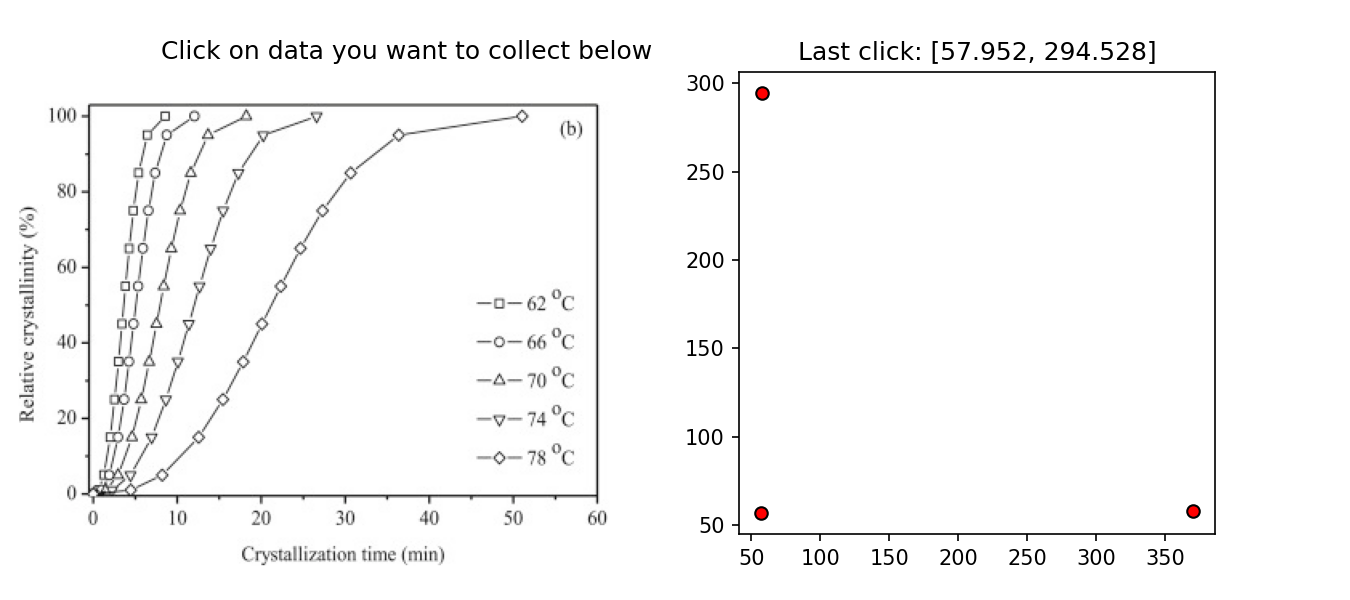

In [47]:
path=r"C:\Users\Sean\OneDrive - Virginia Tech\Documents\Teaching\2114 & 3114 Math I & II\git_2114_3114\images"
filename='crystallization kinetics poly testing 48 2015 p 125.png'
fullpath=os.path.join(path, filename)

selectdata(fullpath)

In [48]:
cal_pixs=pixel_positions

<IPython.core.display.Javascript object>


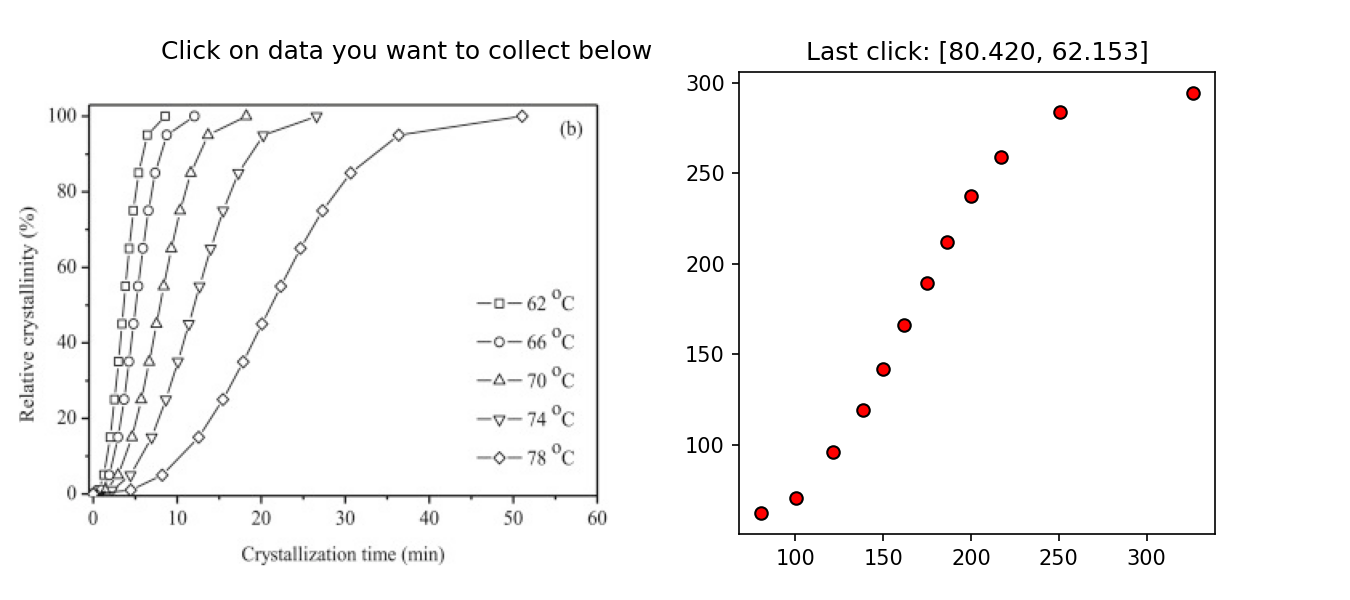

In [49]:
selectdata(fullpath)

In [50]:
dataset1=pixel_positions

<IPython.core.display.Javascript object>


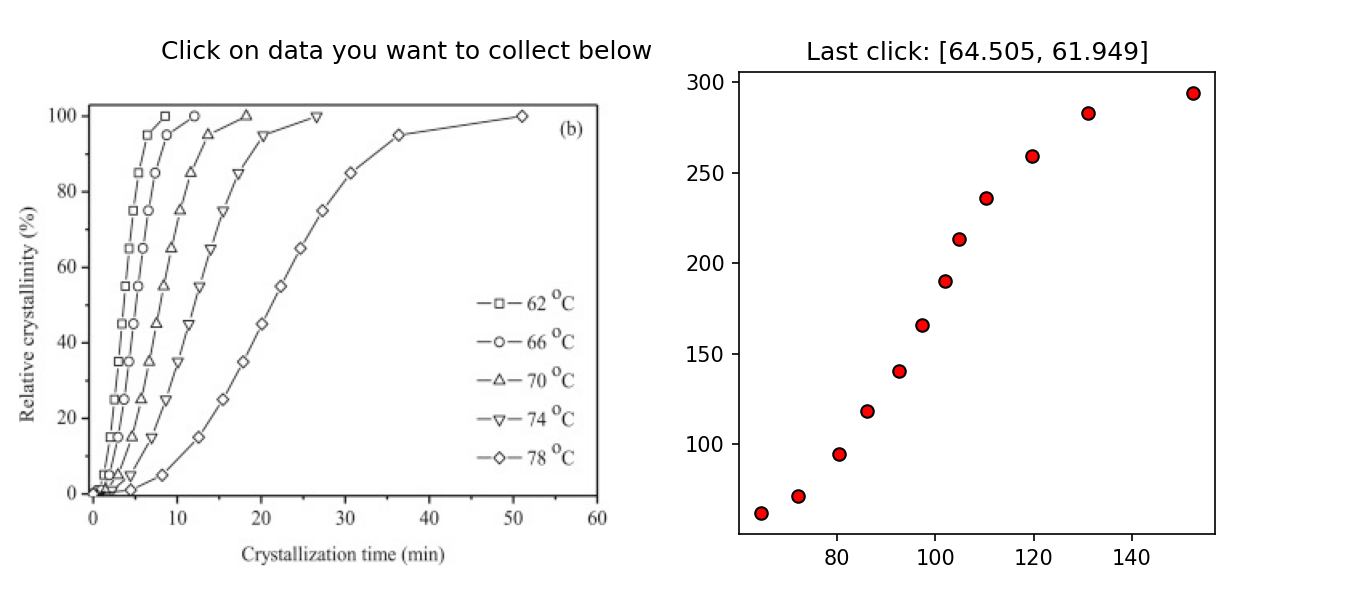

In [51]:
selectdata(fullpath)

In [52]:
dataset2=pixel_positions

In [53]:
plot_data1=cal(cal_pixs, [[60,0],[0,0],[0,100]], dataset1)
plot_data2=cal(cal_pixs, [[60,0],[0,0],[0,100]], dataset2)

<IPython.core.display.Javascript object>


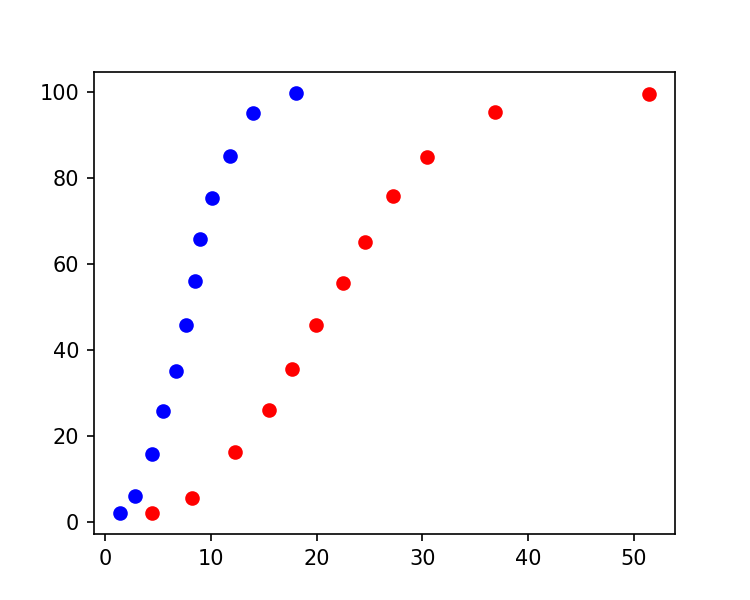

In [54]:
# being a bit more careful and magnifying my window, I got the following calibration values:

plt.subplots(figsize=[5,4])
plt.plot(plot_data1[:,0], plot_data1[:,1], 'ro')
plt.plot(plot_data2[:,0], plot_data2[:,1], 'bo')
plt.show()

### Let's look at a plot of $\log(-\ln(1-X_t))$ vs $\log(t)$.

Since we are using numpy arrays and numpy functions np.log10() and np.log(), we don't need loops!!!

In [56]:
plot_data1=np.abs(plot_data1) # make sure I don't have any negative points
plot_data2=np.abs(plot_data2)
x1new=np.log10(plot_data1[:,0])
y1new=np.log10(-(np.log(1-plot_data1[:,1]/100)))
x2new=np.log10(plot_data2[:,0])
y2new=np.log10(-(np.log(1-plot_data2[:,1]/100)))

>You may get errors above if any of your data points end up negative or greater than 100.  
This can happen since we are picking points so close to 100 and 0 and if your calibration numbers are off a little. 

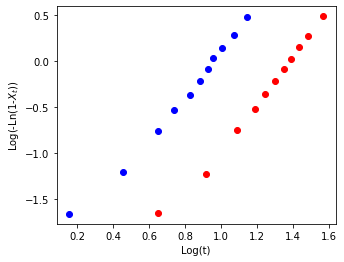

In [58]:
plt.subplots(figsize=[5,4])
plt.plot(x1new[1:], y1new[1:], 'ro') #skipping first point located at x1new[0]
plt.plot(x2new[1:], y2new[1:], 'bo')
plt.xlabel('Log(t)')
plt.ylabel('Log(-Ln(1-$X_t$))')
plt.show()

Looks nice and linear as we expected if the avrami equation was applicable